In [290]:
# Usei como base esse tutorial:
# https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb#scrollTo=f-OHX4DiXd8x

<IPython.core.display.Javascript object>

In [291]:
# # # # Clear logs
# # # %rm -rf ./logs/

# # # Ativação do Tensorboard
# %conda activate pystock
# %load_ext tensorboard

# # # Reload Tensorboar
# %reload_ext tensorboard

<IPython.core.display.Javascript object>

In [292]:
# # # Reload Tensorboar
# %reload_ext tensorboa

<IPython.core.display.Javascript object>

In [293]:
%load_ext nb_black
%load_ext lab_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


<IPython.core.display.Javascript object>

# Sequential model

*Dense model 16*
*Dense model 16*
*Dense model 8*
*Dense model 4*
*Epoch 350*

_MSE: 1.31_
epoch: 350

Activation: softplus
Optimizer: Adam

15/15 - 0s - loss: 0.6325 - mae: 0.5830 - mse: 0.6325
Testing set Mean Abs Error:  0.58 ibova_0

In [294]:
import pathlib
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ModelCheckpoint
import keras_tuner as kt

<IPython.core.display.Javascript object>

# Lendo Dfs

In [295]:
# 80%
PATH_TREINO = "../Data/3_Gold/Treino_all_stocks.csv"
DF_TREINO = pd.read_csv(PATH_TREINO, sep=",")
train_dataset = DF_TREINO
train_dataset = train_dataset.drop(
    [
        "oil_5",
        "usd_5",
        "abev_5",
        "jbs_5",
        "petr_5",
        "vale_5",
    ],
    axis=1,
)
train_labels = train_dataset.pop("ibova_5")

# 20%
PATH_TESTE = "../Data/3_Gold/Teste_all_stocks.csv"
DF_TESTE = pd.read_csv(PATH_TESTE, sep=",")
test_dataset = DF_TESTE
test_dataset = test_dataset.drop(
    [
        "oil_5",
        "usd_5",
        "abev_5",
        "jbs_5",
        "petr_5",
        "vale_5",
    ],
    axis=1,
)
test_labels = test_dataset.pop("ibova_5")

"""
	Resultado
"""
list_activation = []
list_best_epoch = []
list_best_model_path = []
list_hp_unit_1 = []
list_hp_unit_2 = []
list_hp_unit_3 = []
list_hp_unit_4 = []
list_kernel_size_1 = []
list_kernel_size_2 = []
list_learning_rate = []
list_n_filter_1 = []
list_n_filter_2 = []
list_val_mae = []
list_val_mse = []

<IPython.core.display.Javascript object>

In [296]:
# train_dataset.columns

# 'ibova_0', 'ibova_1', 'ibova_2', 'ibova_3', 'ibova_4',
# 'oil_0', 'oil_1', 'oil_2', 'oil_3', 'oil_4', 'usd_0', 'usd_1', 'usd_2',
# 'usd_3', 'usd_4', 'abev_0', 'abev_1', 'abev_2', 'abev_3', 'abev_4',
# 'jbs_0', 'jbs_1', 'jbs_2', 'jbs_3', 'jbs_4', 'petr_0', 'petr_1',
# 'petr_2', 'petr_3', 'petr_4', 'vale_0', 'vale_1', 'vale_2', 'vale_3',
# 'vale_4'

<IPython.core.display.Javascript object>

# Inspecionando os dados

In [297]:
# sns.pairplot(
#     train_dataset[
#         [
#             "ibova_0",
#             "ibova_1",
#             "ibova_2",
#             "ibova_3",
#             "ibova_4",
#             "oil_0",
#             "oil_1",
#             "oil_2",
#             "oil_3",
#             "oil_4",
#             "usd_0",
#             "usd_1",
#             "usd_2",
#             "usd_3",
#             "usd_4",
#         ]
#     ],
#     diag_kind="kde",
# )
# # sns.pairplot(train_dataset[["ibova_0", "oil_0", "usd_0"]], diag_kind="kde")

# train_stats = train_dataset.describe()
# # train_stats

<IPython.core.display.Javascript object>

In [298]:
# sns.pairplot(
#     train_dataset[["ibova_0", "oil_0", "usd_0", "abev_0", "jbs_0", "petr_0", "vale_0"]],
#     diag_kind="kde",
# )

<IPython.core.display.Javascript object>

In [299]:
def save_df_parameters():
    result_columns = [
        "activation",
        "best_epoch",
        "best_model_path",
        "hp_unit_1",
        "hp_unit_2",
        "hp_unit_3",
        "hp_unit_4",
        "kernel_size_1",
        "kernel_size_2",
        "learning_rate",
        "n_filter_1",
        "n_filter_2",
        "val_mae",
        "val_mse",
    ]

    data = list(
        zip(
            list_activation,
            list_best_epoch,
            list_best_model_path,
            list_hp_unit_1,
            list_hp_unit_2,
            list_hp_unit_3,
            list_hp_unit_4,
            list_kernel_size_1,
            list_kernel_size_2,
            list_learning_rate,
            list_n_filter_1,
            list_n_filter_2,
            list_val_mae,
            list_val_mse,
        )
    )

    df_resultados = pd.DataFrame(
        data,
        columns=result_columns,
    )

    df_resultados.to_csv(f"Resultados_{TYPE_MODEL}_{SAVE_TIME}.csv")

<IPython.core.display.Javascript object>

In [300]:
def save_parameters():
    try:
        value_activation = best_hps.get("activation")
    except:
        value_activation = None
    try:
        value_learning_rate = best_hps.get("learning_rate")
    except:
        value_learning_rate = None
    try:
        value_unit_1 = best_hps.get("unit_1")
    except:
        value_unit_1 = None
    try:
        value_unit_2 = best_hps.get("unit_2")
    except:
        value_unit_2 = None
    try:
        value_unit_3 = best_hps.get("unit_3")
    except:
        value_unit_3 = None
    try:
        value_unit_4 = best_hps.get("unit_4")
    except:
        value_unit_4 = None
    try:
        value_kernel_size_1 = best_hps.get("kernel_size_1")
    except:
        value_kernel_size_1 = None
    try:
        value_kernel_size_2 = best_hps.get("kernel_size_2")
    except:
        value_kernel_size_2 = None
    try:
        value_n_filter_1 = best_hps.get("n_filter_1")
    except:
        value_n_filter_1 = None
    try:
        value_n_filter_2 = best_hps.get("n_filter_2")
    except:
        value_n_filter_2 = None

    """"Repeticao MODEL.ipynb"""

    def save_in_list(one_list, value=None):
        try:
            one_list.append(value)
            return one_list
        except:
            one_list.append(None)
            return one_list

    save_in_list(list_activation, value_activation)
    save_in_list(list_best_epoch, best_epoch)
    save_in_list(list_best_model_path, bst_model_path)
    save_in_list(list_hp_unit_1, value_unit_1)
    save_in_list(list_hp_unit_2, value_unit_2)
    save_in_list(list_hp_unit_3, value_unit_3)
    save_in_list(list_hp_unit_4, value_unit_4)
    save_in_list(list_kernel_size_1, value_kernel_size_1)
    save_in_list(list_kernel_size_2, value_kernel_size_2)
    save_in_list(list_learning_rate, value_learning_rate)
    save_in_list(list_n_filter_1, value_n_filter_1)
    save_in_list(list_n_filter_2, value_n_filter_2)
    save_in_list(list_val_mae, min(history.history["val_mae"]))
    save_in_list(list_val_mse, min(history.history["val_mse"]))

<IPython.core.display.Javascript object>

# Definindo o modelo

In [301]:
def model_builder(hp):
    hp_unit_1 = hp.Int("unit_1", min_value=16, max_value=64, step=1)
    activationL = [
        "relu",
        "sigmoid",
        "softplus",
        "softsign",
        "tanh",
        "selu",
        "elu",
        "exponential",
        "relu",
    ]
    activation_choice = hp.Choice("activation", values=activationL)
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model = keras.models.Sequential(
        [
            layers.LSTM(
                units=hp_unit_1,
                return_sequences=True,
                input_shape=(36, 1),
                activation=activation_choice,
            ),
            tf.keras.layers.Flatten(),
            layers.Dense(units=1, activation="linear"),
        ]
    )

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss="mse",
        metrics=["mae", "mse"],
    )

    return model


# rmse pra avaliação, nao para loss

<IPython.core.display.Javascript object>

In [302]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 36, 50)            10400     
                                                                 
 flatten_20 (Flatten)        (None, 1800)              0         
                                                                 
 dense_20 (Dense)            (None, 1)                 1801      
                                                                 
Total params: 12,201
Trainable params: 12,201
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

# Instanciando Tuner

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/keras_tuner.ipynb#scrollTo=McO82AXOuxXh

# Selecionando a melhor epoca do modelo

In [303]:
def experimento():

    EPOCHS = 100
    TYPE_MODEL = "LSTM"
    SAVE_TIME = datetime.datetime.strftime(datetime.datetime.now(), "%y_%m_%d_%Hh%Mm%S")

    tuner = kt.Hyperband(
        model_builder,
        objective="val_mse",
        max_epochs=10,
        factor=3,
        directory="logs",
        project_name="hyper_parameters",
    )

    best_hps = tuner.get_best_hyperparameters(num_trials=20)[0]

    bst_model_path = f"Models/{TYPE_MODEL}/model_{save_time}.h5"
    model_checkpoint = ModelCheckpoint(
        bst_model_path, save_best_only=True, monitor="val_mse", mode="min"
    )

    model = tuner.hypermodel.build(best_hps)
    history = model.fit(
        train_dataset,
        train_labels,
        epochs=EPOCHS,
        validation_split=0.2,
        verbose=0,
        callbacks=([model_checkpoint]),
    )

    # Select the best epoch,
    val_mse_per_epoch = history.history["val_mse"]
    best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1

    save_parameters()
    save_df_parameters()
    best_hps = None

<IPython.core.display.Javascript object>

In [304]:
for i in range(10):
    experimento()

INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from existing project logs\hyper_parameters\oracle.json
INFO:tensorflow:Reloading Tuner from logs\hyper_parameters\tuner0.json
INFO:tensorflow:Reloading Oracle from ex

<IPython.core.display.Javascript object>

In [318]:
print("Best epoch: %d" % (best_epoch,))
print(f'val_mae: {min(history.history["val_mae"])}')
print(f'val_mse: {min(history.history["val_mse"])}')

print(f'unit_1: {best_hps.get("unit_1")}')
print(f'unit_2: {best_hps.get("unit_2")}')
print(f'unit_3: {best_hps.get("unit_3")}')
print(f'unit_4: {best_hps.get("unit_4")}')
print(f'learning_rate: {best_hps.get("learning_rate")}')
print(f'activation: {best_hps.get("activation")}')

Best epoch: 62
val_mae: 0.17023776471614838
val_mse: 0.04667561128735542
unit_1: 50
unit_2: 19
unit_3: 12
unit_4: 21
learning_rate: 0.01
activation: elu


<IPython.core.display.Javascript object>

# Treinando modelo

In [306]:
eval_result = model.evaluate(test_dataset, test_labels)
print("[test loss, test accuracy]:", eval_result)

15/15 [==============================] - 0s 11ms/step - loss: 0.1603 - mae: 0.2307 - mse: 0.1603
[test loss, test accuracy]: [0.1603052318096161, 0.23070579767227173, 0.1603052318096161]


<IPython.core.display.Javascript object>

# Avaliando o modelo

In [307]:
# print(f'train_dataset: {train_dataset.columns()} \n')
# print(f'valid_dataset: {valid_dataset.columns()} \n')
# print(f'test_dataset: {test_dataset.columns()} \n')

<IPython.core.display.Javascript object>

In [308]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,0.056616,0.182212,0.056616,0.060151,0.191861,0.060151,95
96,0.057042,0.182599,0.057042,0.046931,0.172054,0.046931,96
97,0.056900,0.181726,0.056900,0.059410,0.195278,0.059410,97
98,0.053468,0.175069,0.053468,0.053980,0.176990,0.053980,98
99,0.052945,0.174942,0.052945,0.059838,0.190011,0.059838,99


<IPython.core.display.Javascript object>

In [309]:
print(f"Min MSE: {hist.mse.min()}")
print(f"Min Val_MSE: {hist.val_mse.min()}")

Min MSE: 0.05294451490044594
Min Val_MSE: 0.04667561128735542


<IPython.core.display.Javascript object>

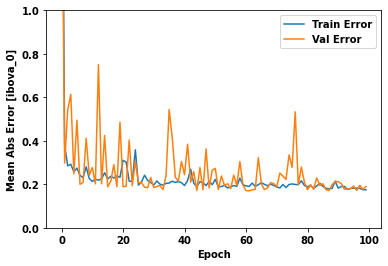

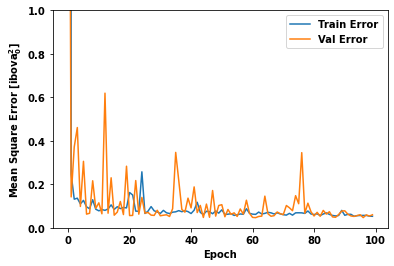

<IPython.core.display.Javascript object>

In [310]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist["epoch"] = history.epoch

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [ibova_0]")
    plt.plot(hist["epoch"], hist["mae"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mae"], label="Val Error")
    plt.ylim([0, 1])
    plt.legend()

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [$ibova_0^2$]")
    plt.plot(hist["epoch"], hist["mse"], label="Train Error")
    plt.plot(hist["epoch"], hist["val_mse"], label="Val Error")
    plt.ylim([0, 1])
    plt.legend()
    plt.show()


plot_history(history)

# Realizando as previsões

In [311]:
test_predictions = model.predict(test_dataset).flatten()

15/15 [==============================] - 0s 9ms/step


<IPython.core.display.Javascript object>

# Avaliando as previsões:

In [312]:
def show_test_labels():
    # Imprimindo valores reais
    plt.plot(test_labels, color="r", label="ibova_REAL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("ibova_REAL")
    plt.legend()


def show_model_predictions():
    # Imprimindo previsoes
    plt.plot(test_predictions, color="g", label="predictions_MODEL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("predictions_MODEL")
    plt.legend()


def show_compare_graph():
    # Predictt X Real values
    plt.plot(test_labels, color="r", label="ibova_REAL")
    plt.plot(test_predictions, color="g", label="predictions_MODEL")
    plt.xlabel("Dates")
    plt.ylabel("Variation ROC")
    plt.title("Predict X Real values")
    plt.legend()
    plt.show()


def show_true_predict_values():
    plt.figure(figsize=(24, 4))
    plt.scatter(test_labels, test_predictions)
    plt.xlabel("True Values [ibova_0]")
    plt.ylabel("Predictions [ibova_0]")
    plt.axis("equal")
    plt.axis("square")
    plt.xlim([0, plt.xlim()[1]])
    plt.ylim([0, plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100])

<IPython.core.display.Javascript object>

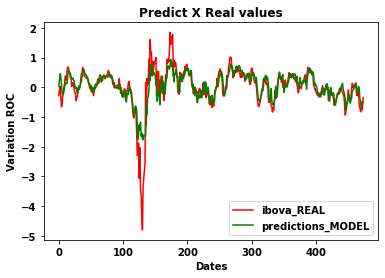

<IPython.core.display.Javascript object>

In [313]:
show_compare_graph()

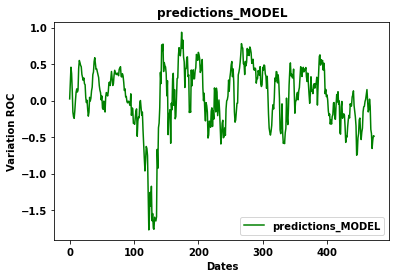

<IPython.core.display.Javascript object>

In [314]:
show_model_predictions()

In [315]:
model_name = f'mlp_unit_1({best_hps.get("unit_1")})unit_2({best_hps.get("unit_2")})unit_3({best_hps.get("unit_3")})unit_4({best_hps.get("unit_4")})_learning({best_hps.get("learning_rate")})_activation({best_hps.get("activation")})'
model_name
model.save(f"models/LSTM/{model_name}date_{save_time}.h5")

<IPython.core.display.Javascript object>

In [316]:
# Analisando Medias:

print(f"Massa de predição: {test_predictions.mean()}")
print(f"Massa inicial: {ibova_test.mean()}")
print(f"Diferenças das médias: {ibova_test.mean() - test_predictions.mean()}")

# Add o RM_MSE medio

Massa de predição: 0.04041365161538124


NameError: name 'ibova_test' is not defined

<IPython.core.display.Javascript object>

In [ ]:
save_time

'22_08_30_22h55m31'

<IPython.core.display.Javascript object>